In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

#### 데이터셋 불러오기

In [66]:
house = load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [67]:
house_df = pd.DataFrame(house.data, columns = house.feature_names)
house_df.to_pickle('house_df.pkl')

In [68]:
house_df = pd.read_pickle('house_df.pkl')
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
house_df['PRICE'] = house.target
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### 컬럼별 상관관계 확인

<AxesSubplot:>

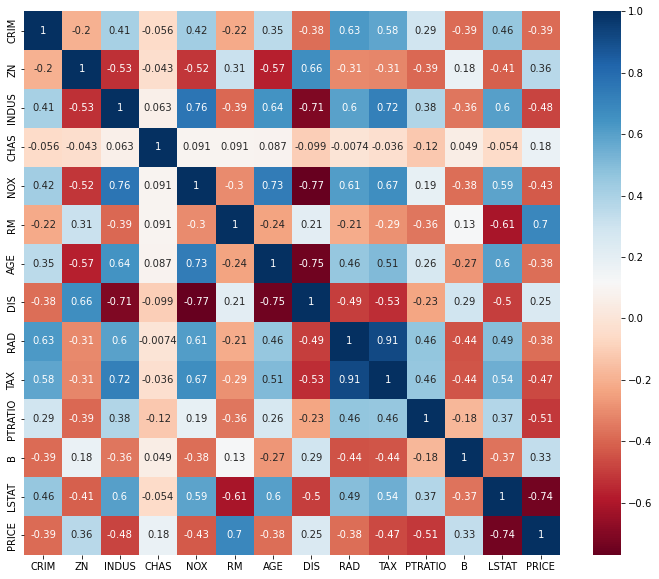

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
sns.heatmap(house_df.corr(), cmap = 'RdBu', annot = True)

In [71]:
# 상관성이 높은 8개 컬럼 추출

house_df.corr().apply(abs).sort_values('PRICE',axis=0,ascending=False)[1:9]
house_df.corr().apply(abs).sort_values('PRICE',axis=0,ascending=False).index[1:9]

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD'], dtype='object')

In [72]:
house_df2 = house_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'PRICE']]
house_df2.head()

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,RAD,PRICE
0,4.98,6.575,15.3,2.31,296.0,0.538,0.00632,1.0,24.0
1,9.14,6.421,17.8,7.07,242.0,0.469,0.02731,2.0,21.6
2,4.03,7.185,17.8,7.07,242.0,0.469,0.02729,2.0,34.7
3,2.94,6.998,18.7,2.18,222.0,0.458,0.03237,3.0,33.4
4,5.33,7.147,18.7,2.18,222.0,0.458,0.06905,3.0,36.2


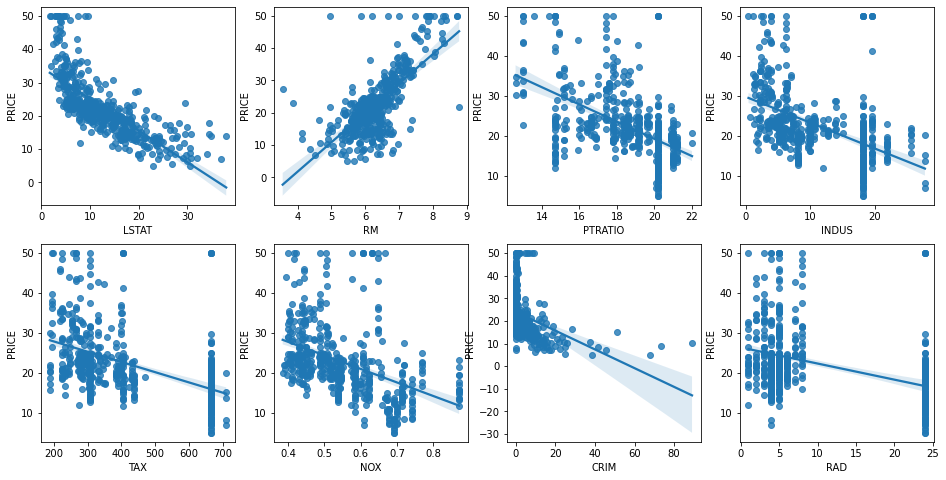

In [74]:
xs = house_df2.columns[:-1]
y = house_df2.columns [-1]


fig, axes = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
for i, x in enumerate(xs):
    row = int(i // 4)
    col = i % 4
    sns.regplot(x, y, data = house_df2, ax = axes[row][col])

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

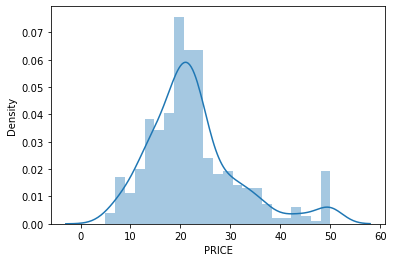

In [75]:
# 표준 정규화

sns.distplot(house_df['PRICE'])

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

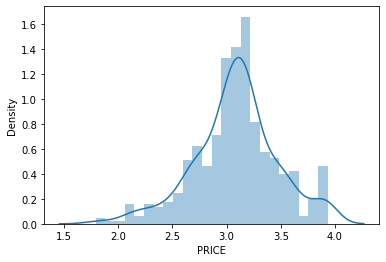

In [76]:
# 로그 변환

y_log = np.log1p(house_df['PRICE'])
sns.distplot(y_log)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = house_df2[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']]
y = house_df2['PRICE']


# 학습/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# 로지스틱 회귀 모델 객체 생성
lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}, \nRMSE: {rmse:.4f}, \nr2score: {r2:.4f}')
print(f'절편값: {lr.intercept_:.2f}')
print(f'회귀계수값: {np.round(lr.coef_,1)}')

MSE: 24.3526, 
RMSE: 4.9348, 
r2score: 0.7343
절편값: 35.85
회귀계수값: [ -0.6   3.3  -1.1   0.2  -0.  -10.3  -0.1   0.3]


# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함
    - (최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합성을 더욱 개선할 수 있음


- 규제는 크게 L1 방식과 L2 방식으로 구분
    - <span style = 'background-color: #fff5b1'>L1를 적용</span>한 회귀를 <span style = 'background-color: #ffdce0'>라쏘</span>: W의 절댓값에 패널티 부여
    -<span style = 'background-color: #fff5b1'> L2를 적용</span>한 회귀를 <span style = 'background-color: #ffdce0'>릿지</span>: W의 제곱에 패널티를 부여
    

- <span style = 'background-color: #ffdce0'>엘리스틱넷 회귀</span>는 <span style = 'background-color: #fff5b1'>L2 규제와 L1 규제를 결합</span>한 회귀


In [105]:
X = house_df.drop('PRICE', axis = 1)
y = house_df['PRICE']

## 규제하지 않은 선형 회귀

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 학습/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# 로지스틱 회귀 모델 객체 생성
lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}, \nRMSE: {rmse:.4f}, \nr2score: {r2:.4f}')
print(f'절편값: {lr.intercept_:.2f}')
print(f'회귀계수값: {np.round(lr.coef_,1)}')

MSE: 19.8313, 
RMSE: 4.4532, 
r2score: 0.7836
절편값: 46.40
회귀계수값: [ -0.1   0.1   0.1   2.4 -21.5   2.8   0.   -1.5   0.3  -0.   -1.    0.
  -0.6]


## 릿지 회귀

In [90]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


# 릿지 회귀 모델화
ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt((-1) * neg_mse_scores)
avg_mse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: ', np.round(avg_mse, 3))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE:  5.518


In [91]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha에 따른 평균 rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt((-1) * neg_mse_scores))
    
    print(f'alpha값이 {alpha}일 때, 5 folds의 평균 RMSE: {avg_rmse:.3f}')

alpha값이 0일 때, 5 folds의 평균 RMSE: 5.829
alpha값이 0.1일 때, 5 folds의 평균 RMSE: 5.788
alpha값이 1일 때, 5 folds의 평균 RMSE: 5.653
alpha값이 10일 때, 5 folds의 평균 RMSE: 5.518
alpha값이 100일 때, 5 folds의 평균 RMSE: 5.330


<span style = 'background-color: #f6f8fa'>alpha 값이 커질 수록 RMSE 값이 작아짐</span>

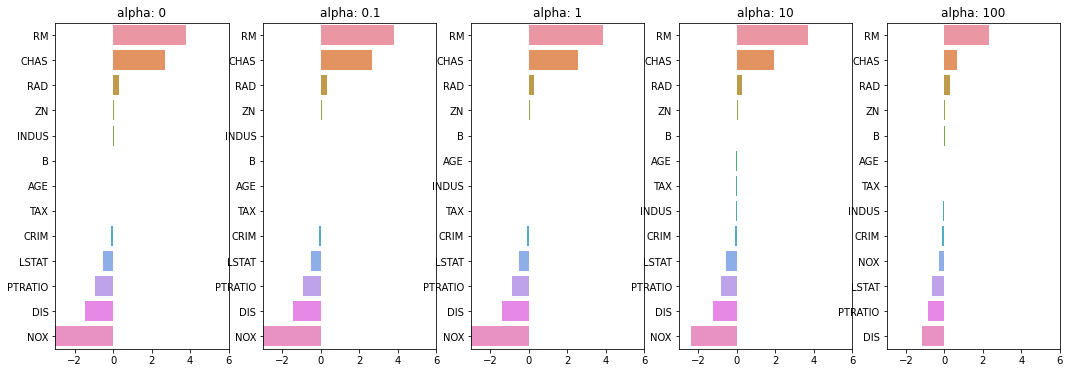

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위해 데이터프레임 형성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력 후 회귀 계수 값 시각화 및 데이터 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    
    # alpha 값에 따른 피처별 회귀계수를 Series화 -> 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index = X.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대그래프로 각 alpha 값에서의 회귀 계수 시각화, 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axes[pos])

plt.show()

alpha값이 커질수록 회귀계수가 점점 작아지는 것을 볼 수 있음<br>
특히 NOX 피처의 경우 크게 감소하는 형태를 보임

## 라쏘 회귀

In [102]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE 출력, 회귀 계수 값들을 데이터프레임으로 반환

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None,
                        verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('########', model_name, '#########')
    
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha = param)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                         scoring = 'neg_mean_squared_error', cv = 5)
        avg_mse = np.mean(np.sqrt((-1) * neg_mse_scores))
        print(f'\t alpha가 {param}일 때, 5 fold 세트의 평균 RMSE: {avg_mse: .3f}')
        
        # 회귀계수 
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀계수 Series화 하고 데이터프레임 컬럼으로 추가
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = 'alpha: ' + str(param)
            coeff_df[colname] = coeff
            
    return display(coeff_df)
            

# 라쏘 회귀에 활용할 alpha 파라미터 지정
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas, X, y)
    

######## Lasso #########
	 alpha가 0.07일 때, 5 fold 세트의 평균 RMSE:  5.612
	 alpha가 0.1일 때, 5 fold 세트의 평균 RMSE:  5.615
	 alpha가 0.5일 때, 5 fold 세트의 평균 RMSE:  5.669
	 alpha가 1일 때, 5 fold 세트의 평균 RMSE:  5.776
	 alpha가 3일 때, 5 fold 세트의 평균 RMSE:  6.189


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


alpha가 0.07일 때, RMSE가 5.612로 가장 좋은 평균 RMSE를 보여줌<br>
NOX 피처는 alpha값에 상관없이 0을 유지하고, CHAS, INDUS 등 다른 피처는 alpha 크기가 증가함에 따라 NOX 피처의 회귀계수가 0으로 바뀜<br><br>
회귀계수가 0인 피처는 회귀식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

## 엘라스틱넷 회귀
- L2, L1 규제를 결합한 회귀
- 수행 시간이 다른 규제에 비해 상대적으로 오래 걸림<br><br>
- 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉하고 다른 피처들은 모두 회귀계수를 0으로 만드는 성향이 강함
- 특히 이런 성향으로 인해 alpha 값에 따라 회귀 계수의 값이 급격하게 변동할 수 있는데 엘라스틱넷 회귀는 이를 완화하기 위해 L2규제를 라쏘 회귀에 추가한 것


- RSS(W) = alpha1 * L1 + alpha2 * L2
- 엘라스틱넷의 <b>alpha 파라미터</b> 값은 <b>alpha1 + alpha2</b>임
- 엘라스틱넷의 <b>l1_ratio 파라미터</b> 값은 <b>alpha1/(alpha1 + alpha2)</b>임
    - l1_ratio -> 0 : L2규제와 동일
    - l1_ratio -> 1 : L1규제와 동일

In [109]:
# 엘라스틱넷에 사용될 alpha 파라미터 값 정의
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elsastic_df = get_linear_reg_eval('ElasticNet', elastic_alphas, X, y)                                      

######## ElasticNet #########
	 alpha가 0.07일 때, 5 fold 세트의 평균 RMSE:  5.503
	 alpha가 0.1일 때, 5 fold 세트의 평균 RMSE:  5.478
	 alpha가 0.5일 때, 5 fold 세트의 평균 RMSE:  5.413
	 alpha가 1일 때, 5 fold 세트의 평균 RMSE:  5.522
	 alpha가 3일 때, 5 fold 세트의 평균 RMSE:  5.954


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000
RM,3.445833,3.252662,1.723610,0.933936,0.000000
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
DIS,-1.199548,-1.181402,-0.989655,-0.762044,-0.224409
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587


alpha가 0.5일 때 RMSE 값이 5.413으로 가장 좋은 예측 성능을 보이고 있음 <br>
또한, 다른 규제와 달리 회귀 계수 값들이 0으로 변환된 경우가 적음<br><br>